## Predict The Flight Ticket Price Hackathon
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Test_set.xlsx')

In [33]:
print(train_data.shape)
print(test_data.shape)

(10683, 11)
(2671, 10)


In [3]:
total_data = train_data.append(test_data)

In [4]:
total_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Data cleaning and feature engineering

In [5]:
total_data['Date']=total_data['Date_of_Journey'].str.split('/').str[0]
total_data['Month']=total_data['Date_of_Journey'].str.split('/').str[1]
total_data['Year']=total_data['Date_of_Journey'].str.split('/').str[2]

In [6]:
total_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [7]:
total_data['Total_Stops'] = total_data['Total_Stops'].replace('non-stop','0 stop')

In [8]:
total_data['Total_Stops'] = total_data['Total_Stops'].str.split(' ').str[0]

In [9]:
# Seperation of Time into hours and minutes 
total_data['Dep_Hours'] = total_data['Dep_Time'].str.split(':').str[0]
total_data['Dep_Minutes'] = total_data['Dep_Time'].str.split(':').str[1]
total_data['Arrival_Hours'] = total_data['Arrival_Time'].str.split(':').str[0]
total_data['Arrival_Minutes'] = total_data['Arrival_Time'].str.split(':').str[1]

In [10]:
total_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,03,2019,22,20,01,10 22 Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,05,2019,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,06,2019,09,25,04,25 10 Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,05,2019,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,01,03,2019,16,50,21,35


In [11]:
#Removing old columns
total_data = total_data.drop(columns=['Date_of_Journey','Arrival_Time','Dep_Time','Duration'],axis=1)

In [12]:
total_data['Arrival_Minutes']=total_data['Arrival_Minutes'].str.split(' ').str[0]

In [13]:
total_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,01,03,2019,16,50,21,35


In [46]:
#Find Null values from dataset (Method 1)
values = []
columns=list(total_data.columns)
for i in columns:
    n = total_data[i].isnull().sum()
    values.append(n)
Null_values = dict(zip(columns,values))
print(Null_values)

{'Airline': 0, 'Source': 0, 'Destination': 0, 'Route': 1, 'Total_Stops': 1, 'Additional_Info': 0, 'Price': 2671, 'Date': 0, 'Month': 0, 'Year': 0, 'Dep_Hours': 0, 'Dep_Minutes': 0, 'Arrival_Hours': 0, 'Arrival_Minutes': 0, 'Duration_Hours': 0, 'Duration_Minutes': 1286}


In [14]:
#Find Null values from dataset (Method 2)
total_data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Dep_Hours             0
Dep_Minutes           0
Arrival_Hours         0
Arrival_Minutes       0
dtype: int64

In [15]:
total_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,01,03,2019,16,50,21,35


In [16]:
for i in range(0,5):
    total_data[i] = total_data['Route'].str.split('→').str[i]

In [17]:
total_data.rename(columns={0:'Route_1',1:'Route_2',2:'Route_3',3:'Route_4',4:'Route_5'},inplace=True)
total_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,03,2019,22,20,01,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,05,2019,05,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,06,2019,09,25,04,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,05,2019,18,05,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,01,03,2019,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [18]:
total_data['Route_3']=total_data['Route_3'].fillna('None')
total_data['Route_4']=total_data['Route_4'].fillna('None')
total_data['Route_5']=total_data['Route_5'].fillna('None')

In [19]:
total_data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Dep_Hours             0
Dep_Minutes           0
Arrival_Hours         0
Arrival_Minutes       0
Route_1               1
Route_2               1
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [20]:
total_data.drop('Route',axis=1,inplace=True)

In [21]:
total_data[total_data['Route_1'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
9039,Air India,Delhi,Cochin,NaN,No info,7480.0,6,05,2019,09,45,09,25,NaN,NaN,None,None,None


In [22]:
total_data.drop(index=9039,inplace=True)

In [23]:
#Replacing NaN values with mode
total_data['Total_Stops']=total_data['Total_Stops'].fillna(total_data['Total_Stops'].mode()[0])

In [24]:
total_data['Price'] = total_data['Price'].fillna(total_data['Price'].mean())

In [25]:
total_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Hours          0
Dep_Minutes        0
Arrival_Hours      0
Arrival_Minutes    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [28]:
total_data.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
Dep_Hours           object
Dep_Minutes         object
Arrival_Hours       object
Arrival_Minutes     object
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
dtype: object

In [29]:
total_data['Total_Stops']=total_data['Total_Stops'].astype(int)
total_data['Date']=total_data['Date'].astype(int)
total_data['Month']=total_data['Month'].astype(int)
total_data['Year']=total_data['Year'].astype(int)
total_data['Dep_Hours']=total_data['Dep_Hours'].astype(int)
total_data['Dep_Minutes']=total_data['Dep_Minutes'].astype(int)
total_data['Arrival_Hours']=total_data['Arrival_Hours'].astype(int)
total_data['Arrival_Minutes']=total_data['Arrival_Minutes'].astype(int)

In [30]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [31]:
# Converting cateorical values in numerical values
total_data['Airline'] = Encoder.fit_transform(total_data['Airline'])
total_data['Source'] = Encoder.fit_transform(total_data['Source'])
total_data['Destination'] = Encoder.fit_transform(total_data['Destination'])
total_data['Additional_Info'] = Encoder.fit_transform(total_data['Additional_Info'])
total_data['Route_1'] = Encoder.fit_transform(total_data['Route_1'])
total_data['Route_2'] = Encoder.fit_transform(total_data['Route_2'])
total_data['Route_3'] = Encoder.fit_transform(total_data['Route_3'])
total_data['Route_4'] = Encoder.fit_transform(total_data['Route_4'])
total_data['Route_5'] = Encoder.fit_transform(total_data['Route_5'])

In [32]:
total_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,22,20,1,10,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,5,50,13,15,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,9,25,4,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,18,5,23,30,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,16,50,21,35,0,34,8,13,5


## Feature Selection

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [37]:
print(train_data.shape)
print(test_data.shape)

(10683, 11)
(2671, 10)


In [38]:
train_set = total_data[0:10683]
test_set = total_data[10683:]

In [39]:
train_set.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,22,20,1,10,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,5,50,13,15,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,9,25,4,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,18,5,23,30,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,16,50,21,35,0,34,8,13,5


In [40]:
X = train_set.drop('Price',axis=1)
Y = train_set['Price']

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state =0)

In [42]:
Model = SelectFromModel(Lasso(alpha=0.05,random_state=0))

In [43]:
Model.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [44]:
Model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [46]:
X_train.columns[Model.get_support()]

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Dep_Hours', 'Dep_Minutes', 'Arrival_Hours',
       'Arrival_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [54]:
#Removing feature suggested by model
X_train = X_train.drop('Year',axis=1)
X_test = X_test.drop('Year',axis=1)

## Using Machine Learning Algorithm: Random_Forest

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [57]:
RF = RandomForestRegressor()

In [63]:
# Number of trees in forest
n_estimators = [int(i) for i in np.arange(100,1200,100)]
#Maximum number of tree levels
max_depth = [int(i) for i in np.arange(5,30,6)]
#Minimum number of samples required to split node
min_samples_split = [2,5,10,20]
#Minimum number of samples required at each tree
min_samples_leaf = [1,2,5,10]

In [64]:
#Create parameters
parameters = {'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(parameters)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], 'max_depth': [5, 11, 17, 23, 29], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [67]:
random = RandomizedSearchCV(RF,param_distributions=parameters,n_iter=20,scoring='neg_mean_squared_error',cv =5,random_state=55)

In [68]:
random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [5, 11, 17, 23, 29],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100]},
                   random_state=55, scoring='neg_mean_squared_error')

In [73]:
random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 17}

In [77]:
RF1 = RandomForestRegressor(n_estimators=100,min_samples_split= 2,min_samples_leaf= 1,max_depth= 17)

In [80]:
Model = RF1.fit(X_train,Y_train)

In [81]:
y_pred=Model.predict(X_test)

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

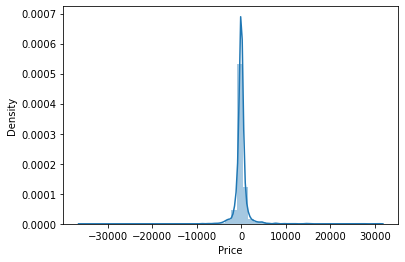

In [82]:
import seaborn as sns

sns.distplot(Y_test-y_pred)

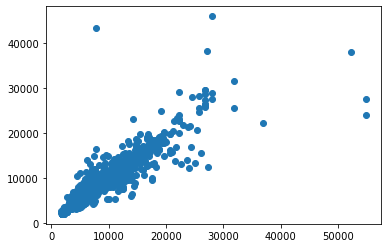

In [83]:
plt.scatter(Y_test,y_pred)